In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
folder = 'E:/GZ-DESI/data'

In [8]:
df = pd.read_parquet(f'{folder}/2023-03-15-cats/definitive-merged-interesting-params.parquet', engine = 'pyarrow')

In [9]:
df[:10]

,id_str,merging_none_fraction,merging_minor-disturbance_fraction,merging_major-disturbance_fraction,merging_merger_fraction,category,ra,dec,log_l_ha,log_l_oiii,photo_z,spec_z,redshift,redshift_nsa,total_sfr_avg,elpetro_mass,logMH,elpetro_mass_log,log_m_bh,log_bolometric_l
0,390393_113,0.378215,0.068470,0.032629,0.520687,merger,315.670729,10.126369,NaN,NaN,0.285089,NaN,0.285089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,388975_4015,0.109286,0.051234,0.068933,0.770546,merger,315.879343,10.010424,NaN,NaN,0.077537,0.095176,0.095176,0.095176,-0.00599,2.396471e+09,NaN,9.379573,NaN,NaN
2,388975_4016,0.093990,0.046352,0.065630,0.794028,merger,315.878811,10.011117,NaN,NaN,0.308635,NaN,0.308635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,388976_4771,0.348186,0.065020,0.034528,0.552266,merger,316.075869,10.014121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,390397_3464,0.305351,0.087567,0.054392,0.552690,merger,316.671962,10.263765,NaN,NaN,0.115421,0.098369,0.098369,0.098369,-0.51189,2.454621e+10,NaN,10.389985,NaN,NaN
5,388981_4969,0.319470,0.058345,0.032611,0.589573,merger,317.310086,10.072413,NaN,NaN,0.284710,NaN,0.284710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,388981_4968,0.334056,0.063459,0.031182,0.571303,merger,317.309291,10.072850,NaN,NaN,0.216640,0.229306,0.229306,NaN,-0.84744,NaN,NaN,NaN,NaN,NaN
7,391822_6063,0.104836,0.068789,0.254898,0.571477,merger,318.529199,10.605800,NaN,NaN,0.200063,NaN,0.200063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,391823_717,0.331179,0.080481,0.041284,0.547057,merger,318.679921,10.395046,NaN,NaN,0.287657,NaN,0.287657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,391823_6736,0.235237,0.148204,0.512880,0.103679,major_interaction,318.737044,10.615450,NaN,NaN,0.258528,NaN,0.258528,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
del df

In [10]:
df_merger = df[['id_str', 'category', 'redshift', 'elpetro_mass_log', 'log_m_bh','log_bolometric_l', 'total_sfr_avg']]

In [11]:
df_z_m = df_merger[['id_str','category','redshift', 'elpetro_mass_log']].dropna()

In [12]:
df_z_m.category.value_counts()

merger               9529
major_interaction    1923
minor_interaction      15
Name: category, dtype: int64

### Plotting Redshift Mass Distrbution

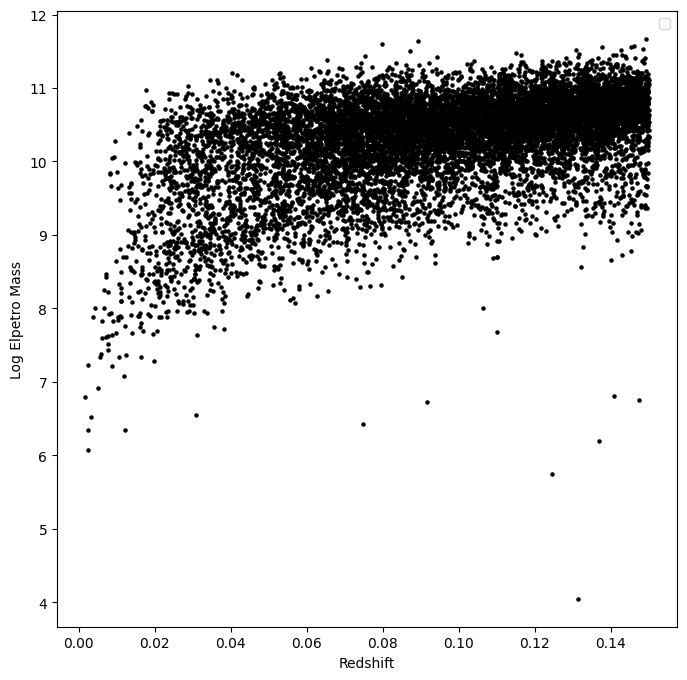

In [13]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_z_m.redshift), list(df_z_m.elpetro_mass_log), color = 'black', label = 'all', s=5)
plt.xlabel('Redshift')
plt.ylabel('Log Elpetro Mass')
plt.legend([])
plt.show()

In [14]:
df_z_m_merger = df_z_m.query('category == "merger"')
df_m_major = df_z_m.query('category == "major_interaction"')
df_m_minor = df_z_m.query('category == "minor_interaction"')

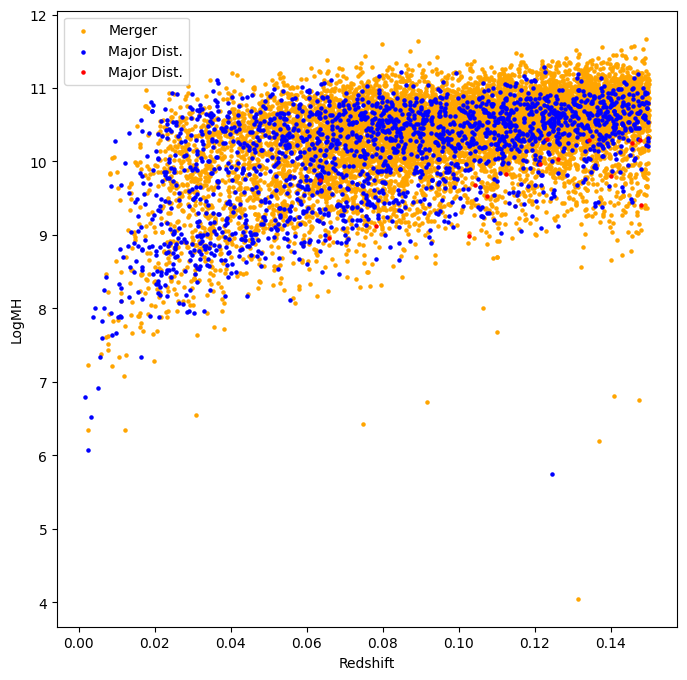

In [15]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_z_m_merger.redshift), list(df_z_m_merger.elpetro_mass_log), color = 'orange', label = 'Merger', s=5)
plt.scatter(list(df_m_major.redshift), list(df_m_major.elpetro_mass_log), color = 'blue', label = 'Major Dist.', s=5)
plt.scatter(list(df_m_minor.redshift), list(df_m_minor.elpetro_mass_log), color = 'red', label = 'Major Dist.', s=5)
plt.xlabel('Redshift')
plt.ylabel('LogMH')
plt.legend()
plt.show()

### Plotting Redshift SFR Distribution

In [16]:
df_z_luminosity = df_merger[['id_str','category','redshift', 'log_bolometric_l']].dropna()
df_z_luminosity

,id_str,category,redshift,log_bolometric_l
233,413788_2192,merger,0.095979,44.80
1343,469389_2644,merger,0.170920,44.22
3059,494914_3897,merger,0.179440,44.09
3841,486184_4807,merger,0.178690,45.00
5230,398441_2854,merger,0.080094,43.18
...,...,...,...,...
194551,389843_4545,merger,0.125945,45.02
195845,438588_484,merger,0.169460,45.01
196136,461416_3309,merger,0.064562,44.90
196486,462769_1960,merger,0.060401,44.08


In [17]:
df_z_lum_merger = df_z_luminosity.query('category == "merger"')
df_lum_major = df_z_luminosity.query('category == "major_interaction"')

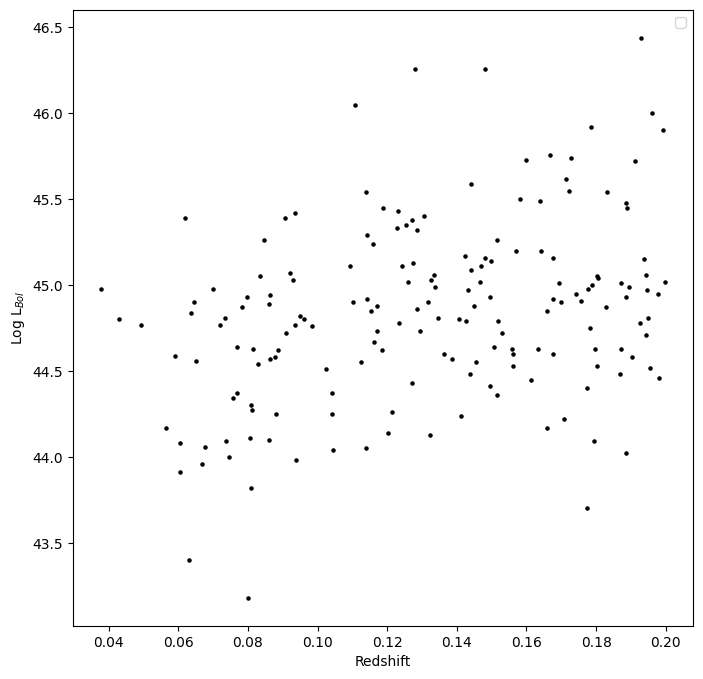

In [18]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_z_luminosity.redshift), list(df_z_luminosity.log_bolometric_l), color = 'black', label = 'all', s=5)
plt.xlabel('Redshift')
plt.ylabel('Log L$_{Bol}$')
plt.legend([])
plt.show()

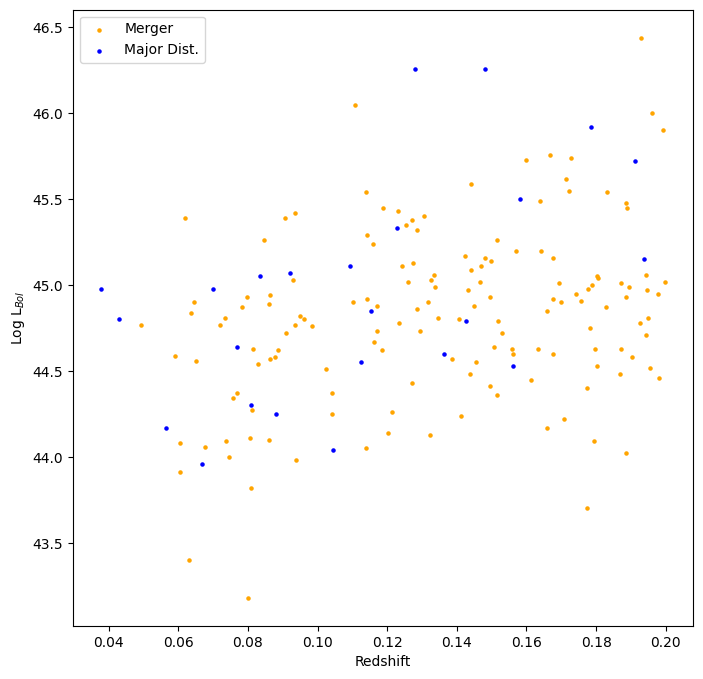

In [19]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_z_lum_merger.redshift), list(df_z_lum_merger.log_bolometric_l), color = 'orange', label = 'Merger', s=5)
plt.scatter(list(df_lum_major.redshift), list(df_lum_major.log_bolometric_l), color = 'blue', label = 'Major Dist.', s=5)
plt.xlabel('Redshift')
plt.ylabel('Log L$_{Bol}$')
plt.legend()
plt.show()

### Plotting Luminosity vs Mass

In [20]:
df_l_m = df_merger[['id_str','category', 'log_bolometric_l', 'elpetro_mass_log']].dropna()
df_l_m

,id_str,category,log_bolometric_l,elpetro_mass_log
233,413788_2192,merger,44.80,10.377165
5230,398441_2854,merger,43.18,10.467967
6906,473356_723,merger,45.06,10.327873
7007,452209_3321,major_interaction,44.04,10.438351
7461,413861_680,merger,45.54,10.450660
...,...,...,...,...
191146,384372_429,major_interaction,44.79,10.123168
193997,394031_175,major_interaction,44.60,10.639538
194551,389843_4545,merger,45.02,10.824236
196136,461416_3309,merger,44.90,10.091057


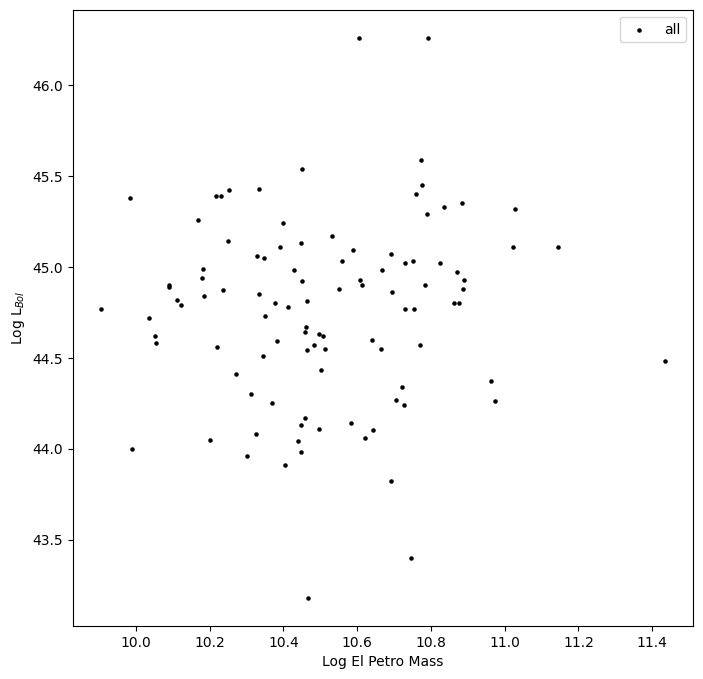

In [21]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_l_m.elpetro_mass_log), list(df_l_m.log_bolometric_l), color = 'black', label = 'all', s=5)
plt.xlabel('Log El Petro Mass')
plt.ylabel('Log L$_{Bol}$')
plt.legend()
plt.show()

In [22]:
df_l_m_merg = df_l_m.query('category == "merger"')
df_l_m_major = df_l_m.query('category == "major_interaction"')

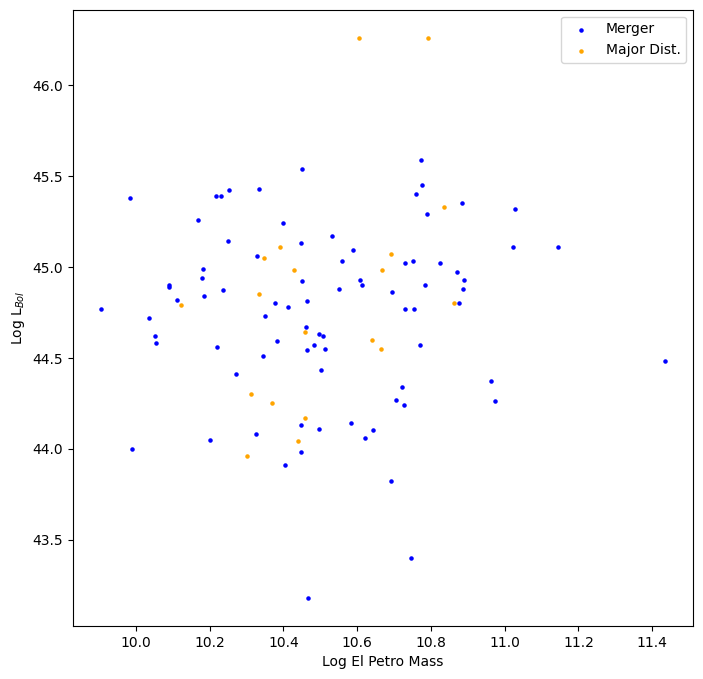

In [23]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_l_m_merg.elpetro_mass_log), list(df_l_m_merg.log_bolometric_l), color = 'blue', label = 'Merger', s=5)
plt.scatter(list(df_l_m_major.elpetro_mass_log), list(df_l_m_major.log_bolometric_l), color = 'orange', label = 'Major Dist.', s=5)
plt.xlabel('Log El Petro Mass')
plt.ylabel('Log L$_{Bol}$')
plt.legend()
plt.show()

### Plotting Mass vs SFR

In [24]:
df_m_sfr = df_merger[['id_str','category', 'elpetro_mass_log', 'total_sfr_avg']].dropna().query('total_sfr_avg > -50')
df_m_sfr

,id_str,category,elpetro_mass_log,total_sfr_avg
1,388975_4015,merger,9.379573,-0.00599
4,390397_3464,merger,10.389985,-0.51189
40,438612_3569,merger,9.943689,-1.59613
49,388996_4730,merger,9.153876,0.02186
55,391834_716,merger,10.746716,0.48156
...,...,...,...,...
197107,435878_3506,merger,9.833304,0.10875
197108,433142_4933,merger,10.305484,-0.57176
197111,437239_2231,major_interaction,10.928187,0.11274
197113,441328_722,major_interaction,10.607638,0.76109


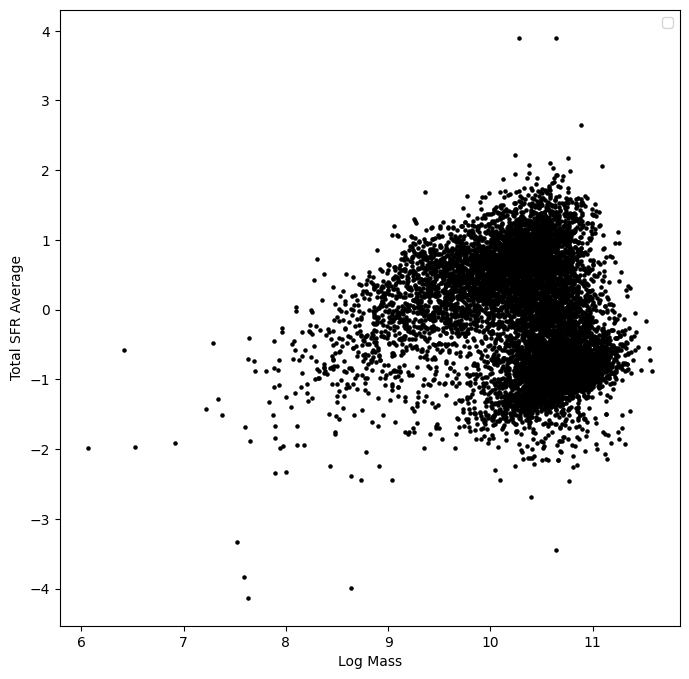

In [25]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_m_sfr.elpetro_mass_log), list(df_m_sfr.total_sfr_avg), color = 'black', label = 'all', s=5)
plt.xlabel('Log Mass')
plt.ylabel('Total SFR Average')
plt.legend([])
plt.show()

In [26]:
df_m_sfr.category.value_counts()

merger               7215
major_interaction    1591
minor_interaction      15
Name: category, dtype: int64

In [27]:
df_m_sfr_merg = df_m_sfr.query('category == "merger"')
df_m_sfr_major = df_m_sfr.query('category == "major_interaction"')
df_m_sfr_minor = df_m_sfr.query('category == "minor_interaction"')

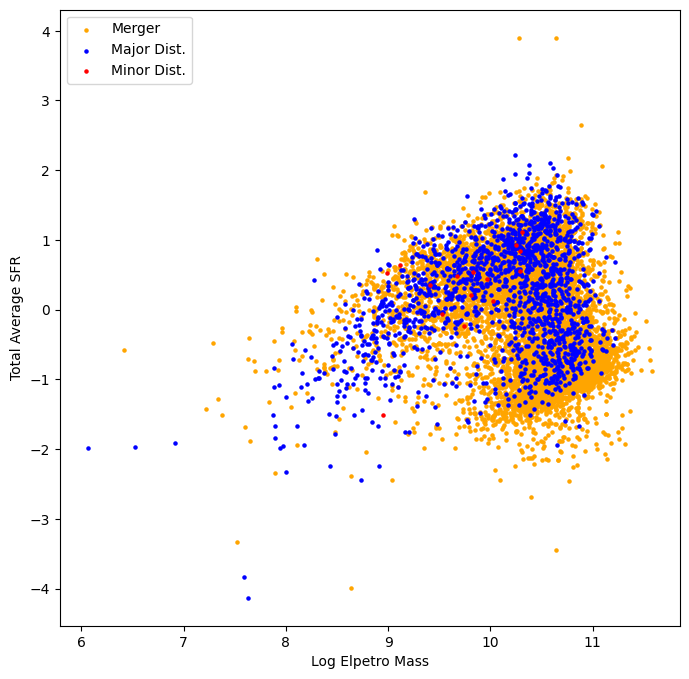

In [28]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_m_sfr_merg.elpetro_mass_log), list(df_m_sfr_merg.total_sfr_avg), color = 'orange', label = 'Merger', s=5)
plt.scatter(list(df_m_sfr_major.elpetro_mass_log), list(df_m_sfr_major.total_sfr_avg), color = 'blue', label = 'Major Dist.', s=5)
plt.scatter(list(df_m_sfr_minor.elpetro_mass_log), list(df_m_sfr_minor.total_sfr_avg), color = 'red', label = 'Minor Dist.', s=5)
plt.xlabel('Log Elpetro Mass')
plt.ylabel('Total Average SFR')
plt.legend()
plt.show()

### Controlling for Redshift

In [71]:
df_m_sfr_z = df_merger[['id_str','category', 'elpetro_mass_log', 'total_sfr_avg', 'redshift']].dropna().query('total_sfr_avg > -50')
df_m_sfr_z

,id_str,category,elpetro_mass_log,total_sfr_avg,redshift
1,388975_4015,merger,9.379573,-0.00599,0.095176
4,390397_3464,merger,10.389985,-0.51189,0.098369
40,438612_3569,merger,9.943689,-1.59613,0.052279
49,388996_4730,merger,9.153876,0.02186,0.059486
55,391834_716,merger,10.746716,0.48156,0.093409
...,...,...,...,...,...
197107,435878_3506,merger,9.833304,0.10875,0.075134
197108,433142_4933,merger,10.305484,-0.57176,0.102314
197111,437239_2231,major_interaction,10.928187,0.11274,0.139334
197113,441328_722,major_interaction,10.607638,0.76109,0.138673


In [72]:
df_m_sfr_z.category.value_counts()

merger               7215
major_interaction    1591
minor_interaction      15
Name: category, dtype: int64

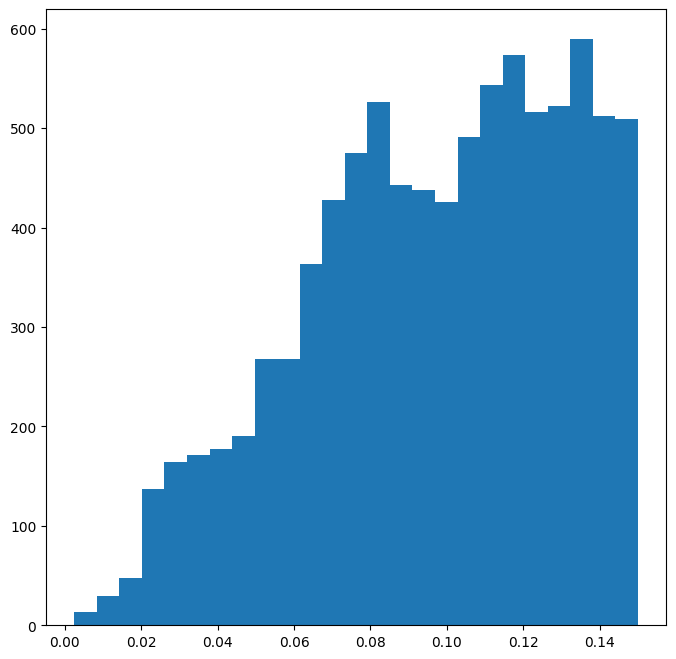

In [85]:
plt.figure(figsize = (8,8))
plt.hist(list(df_m_sfr_z.redshift), bins = 25)
plt.show()

In [88]:
df_z_1 = df_m_sfr_z.query('redshift <= 0.03')
df_z_2 = df_m_sfr_z.query('redshift > 0.03 and redshift <= 0.8')
df_z_3 = df_m_sfr_z.query('redshift > 0.08 and redshift <= 0.13')
df_z_4 = df_m_sfr_z.query('redshift > 0.13')

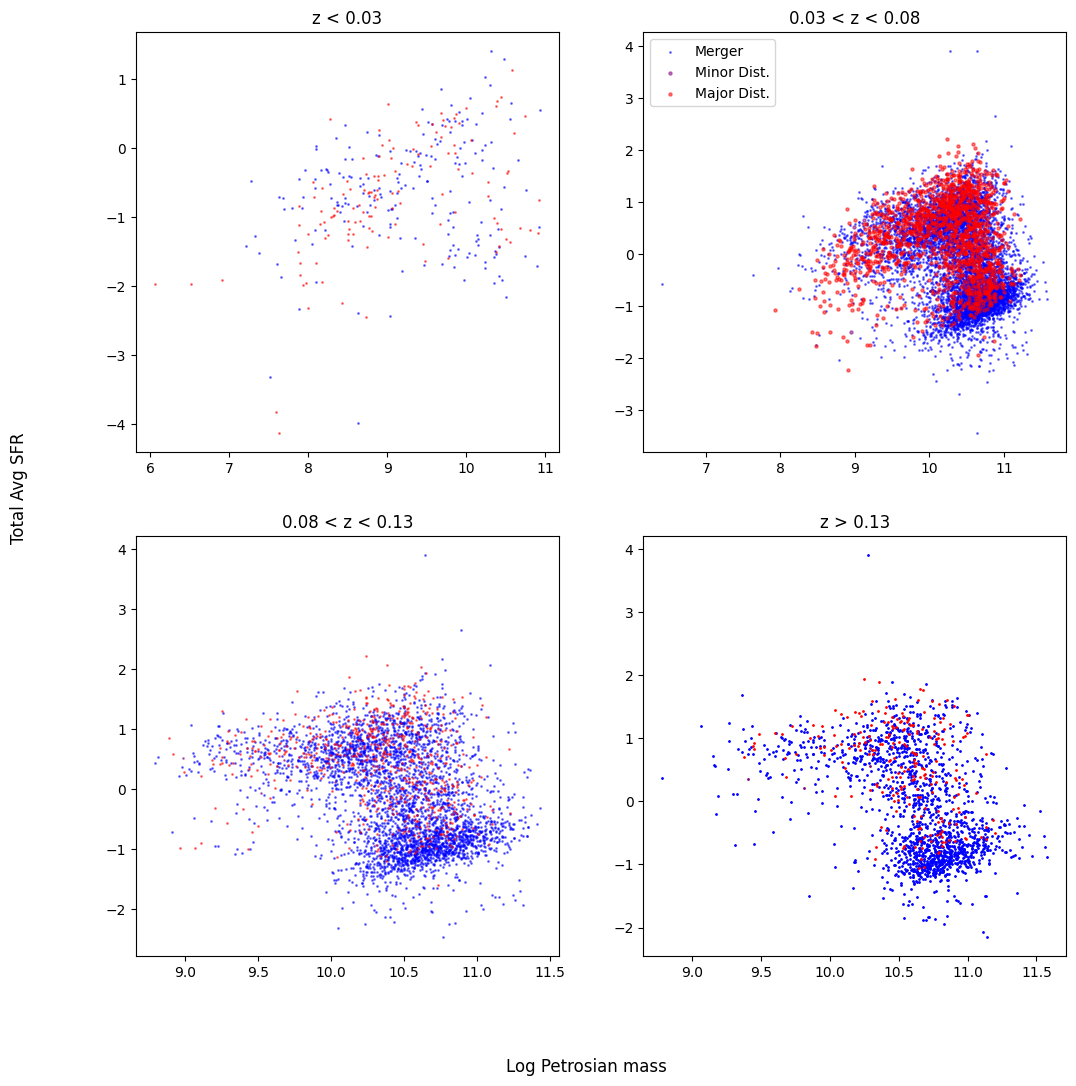

In [110]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize = (12,12))

axes[0,0].scatter(list(df_z_1.query('category=="merger"').elpetro_mass_log), list(df_z_1.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5)
axes[0,0].scatter(list(df_z_1.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_1.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1, alpha = 0.5)
axes[0,0].scatter(list(df_z_1.query('category=="major_interaction"').elpetro_mass_log), list(df_z_1.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1, alpha = 0.5)
axes[0,0].set_title('z < 0.03')

axes[0,1].scatter(list(df_z_2.query('category=="merger"').elpetro_mass_log), list(df_z_2.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5, label = 'Merger')
axes[0,1].scatter(list(df_z_2.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_2.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 5, alpha = 0.5, label = 'Minor Dist.')
axes[0,1].scatter(list(df_z_2.query('category=="major_interaction"').elpetro_mass_log), list(df_z_2.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 5, alpha = 0.5, label = 'Major Dist.')
axes[0,1].set_title('0.03 < z < 0.08')

axes[1,0].scatter(list(df_z_3.query('category=="merger"').elpetro_mass_log), list(df_z_3.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5)
axes[1,0].scatter(list(df_z_3.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_3.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1, alpha = 0.5)
axes[1,0].scatter(list(df_z_3.query('category=="major_interaction"').elpetro_mass_log), list(df_z_3.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1, alpha = 0.5)
axes[1,0].set_title('0.08 < z < 0.13')

axes[1,1].scatter(list(df_z_4.query('category=="merger"').elpetro_mass_log), list(df_z_4.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1)
axes[1,1].scatter(list(df_z_4.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_4.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1)
axes[1,1].scatter(list(df_z_4.query('category=="major_interaction"').elpetro_mass_log), list(df_z_4.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1)
axes[1,1].set_title('z > 0.13')

fig.supxlabel('Log Petrosian mass')
fig.supylabel('Total Avg SFR')
axes[0,1].legend()
plt.show()

### Black Hole Mass

In [29]:
df_bh_m = df[['id_str','category','elpetro_mass_log','log_m_bh']].dropna()

In [30]:
df_bh_m

,id_str,category,elpetro_mass_log,log_m_bh
233,413788_2192,merger,10.377165,6.51
5230,398441_2854,merger,10.467967,6.45
6906,473356_723,merger,10.327873,8.26
7007,452209_3321,major_interaction,10.438351,6.97
7461,413861_680,merger,10.450660,7.84
...,...,...,...,...
191146,384372_429,major_interaction,10.123168,6.61
193997,394031_175,major_interaction,10.639538,6.86
194551,389843_4545,merger,10.824236,7.46
196136,461416_3309,merger,10.091057,7.16


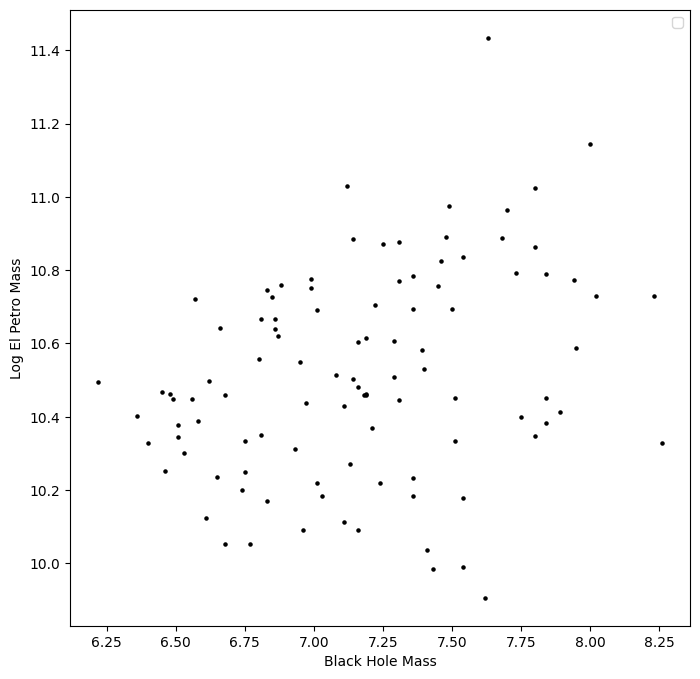

In [34]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_bh_m.log_m_bh), list(df_bh_m.elpetro_mass_log), color = 'black', label = 'all', s=5)
plt.ylabel('Log El Petro Mass')
plt.xlabel('Black Hole Mass')
plt.legend([])
plt.show()

In [35]:
df_bh_m.category.value_counts()

merger               83
major_interaction    19
Name: category, dtype: int64

In [36]:
df_bh_m_merg = df_bh_m.query('category == "merger"')
df_bh_m_maj = df_bh_m.query('category == "major_interaction"')

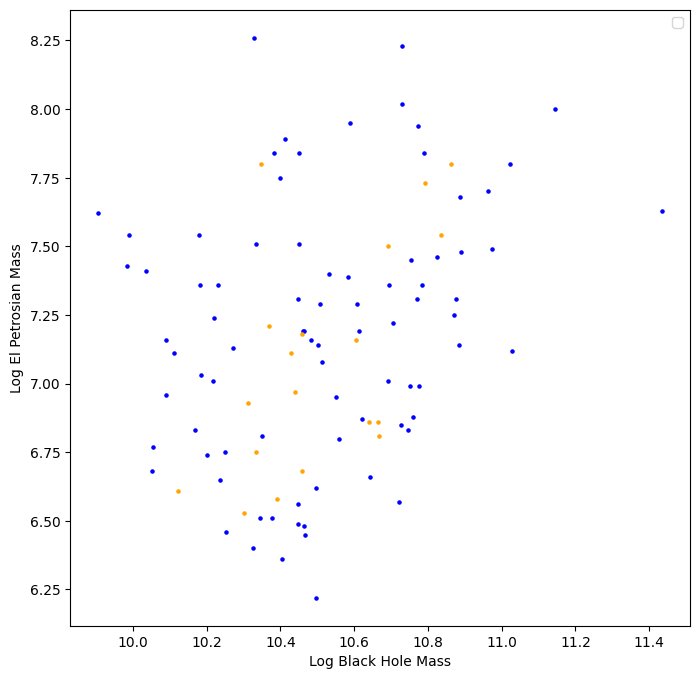

In [37]:
plt.figure(figsize = (8,8))
plt.scatter(df_bh_m_merg.elpetro_mass_log, df_bh_m_merg.log_m_bh, color = 'blue', label = 'Merger', s=5)
plt.scatter(df_bh_m_maj.elpetro_mass_log, df_bh_m_maj.log_m_bh, color = 'orange', label = 'Major', s=5)
plt.xlabel('Log Black Hole Mass')
plt.ylabel('Log El Petrosian Mass')
plt.legend([])
plt.show()

### Comparing to a Non-Merging Subset

In [39]:
df = pd.read_parquet(f'{folder}/2023-03-15-cats/definitive-not-merged-interesting-params.parquet', engine = 'pyarrow', columns = ['id_str', 'category', 'redshift', 'elpetro_mass_log', 'log_m_bh','log_bolometric_l', 'total_sfr_avg'])

In [43]:
df_bh_m_non = df[['id_str', 'category', 'log_m_bh','elpetro_mass_log']].dropna()

In [44]:
df_bh_m_non

,id_str,category,log_m_bh,elpetro_mass_log
872,438611_3050,none,7.85,10.757145
977,410282_3510,none,6.57,10.404587
1522,394647_1699,none,7.17,10.219479
1537,394648_5804,none,7.01,9.790451
1887,439974_2044,none,6.48,10.376805
...,...,...,...,...
7736666,431748_1215,none,6.57,10.426129
7737295,428998_48,none,7.81,9.783773
7738193,435857_3280,none,7.77,10.530573
7738909,444031_537,none,7.17,10.432407


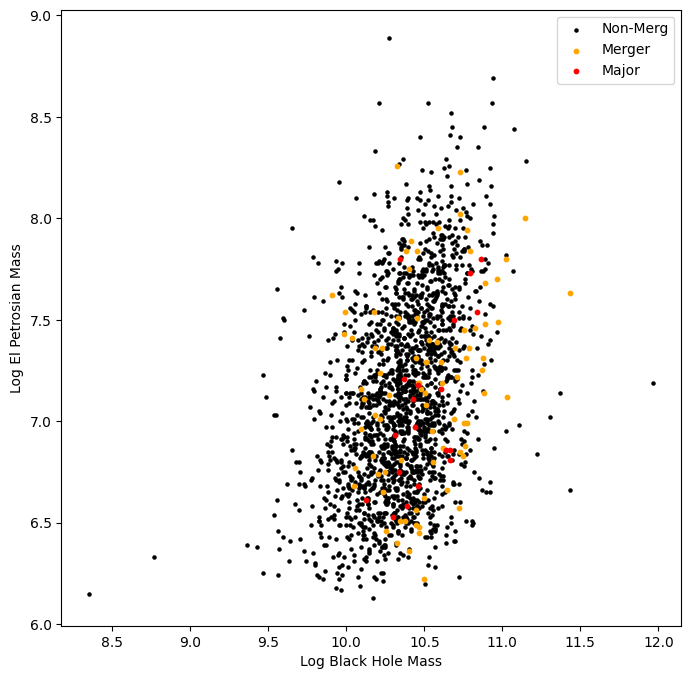

In [54]:
plt.figure(figsize = (8,8))
plt.scatter(df_bh_m_non.elpetro_mass_log, df_bh_m_non.log_m_bh, color = 'black', label = 'Non-Merg', s=5)
plt.scatter(df_bh_m_merg.elpetro_mass_log, df_bh_m_merg.log_m_bh, color = 'orange', label = 'Merger', s=10)
plt.scatter(df_bh_m_maj.elpetro_mass_log, df_bh_m_maj.log_m_bh, color = 'red', label = 'Major', s=10)
plt.xlabel('Log Black Hole Mass')
plt.ylabel('Log El Petrosian Mass')
plt.legend()
plt.show()

### SF

In [63]:
df_m_sfr_non_tmp = df[['id_str', 'category', 'total_sfr_avg','elpetro_mass_log']].dropna().query('total_sfr_avg > -50')
df_m_sfr_non_tmp

,id_str,category,total_sfr_avg,elpetro_mass_log
28,388974_5805,none,-0.63351,10.636278
73,390395_2577,none,-1.54185,10.111020
76,390395_2817,none,0.07252,9.515684
99,388979_5261,none,-0.17914,10.191099
100,388979_5181,none,-1.02662,10.620791
...,...,...,...,...
7744210,442690_2328,none,-0.83885,10.444693
7744214,442691_3268,none,0.03805,9.379950
7744217,442691_3017,none,-0.94027,10.140887
7744226,444047_84,none,-0.12839,10.208566


In [65]:
df_m_sfr_non = df_m_sfr_non_tmp.query('total_sfr_avg < 3.5')
df_m_sfr_non

,id_str,category,total_sfr_avg,elpetro_mass_log
28,388974_5805,none,-0.63351,10.636278
73,390395_2577,none,-1.54185,10.111020
76,390395_2817,none,0.07252,9.515684
99,388979_5261,none,-0.17914,10.191099
100,388979_5181,none,-1.02662,10.620791
...,...,...,...,...
7744210,442690_2328,none,-0.83885,10.444693
7744214,442691_3268,none,0.03805,9.379950
7744217,442691_3017,none,-0.94027,10.140887
7744226,444047_84,none,-0.12839,10.208566


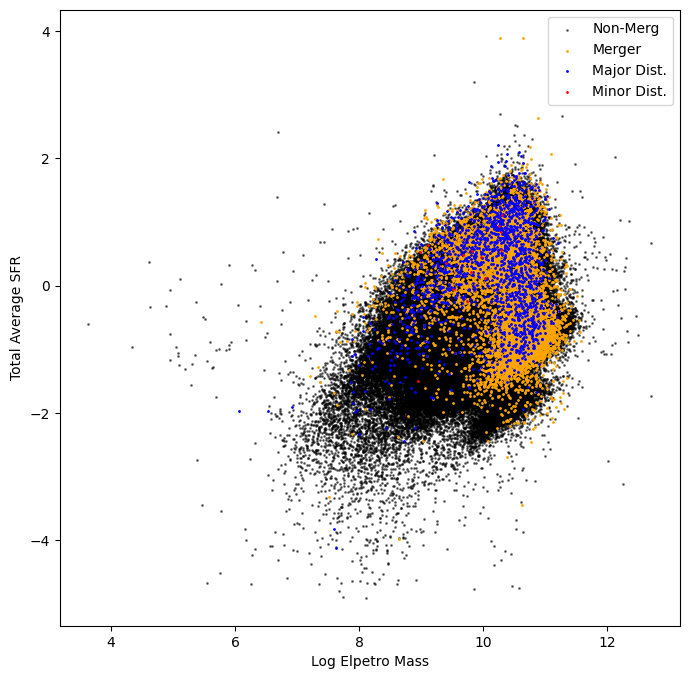

In [66]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_m_sfr_non.elpetro_mass_log), list(df_m_sfr_non.total_sfr_avg), color = 'black', label = 'Non-Merg', s=1, alpha = 0.5)
plt.scatter(list(df_m_sfr_merg.elpetro_mass_log), list(df_m_sfr_merg.total_sfr_avg), color = 'orange', label = 'Merger', s=1)
plt.scatter(list(df_m_sfr_major.elpetro_mass_log), list(df_m_sfr_major.total_sfr_avg), color = 'blue', label = 'Major Dist.', s=1)
plt.scatter(list(df_m_sfr_minor.elpetro_mass_log), list(df_m_sfr_minor.total_sfr_avg), color = 'red', label = 'Minor Dist.', s=1)
plt.xlabel('Log Elpetro Mass')
plt.ylabel('Total Average SFR')
plt.legend()
plt.show()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


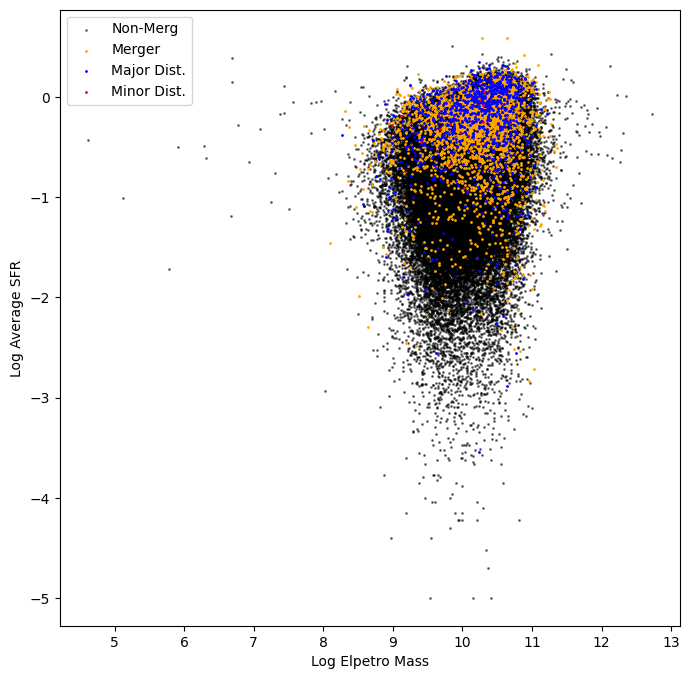

In [68]:
plt.figure(figsize = (8,8))
plt.scatter(list(df_m_sfr_non.elpetro_mass_log), np.log10(list(df_m_sfr_non.total_sfr_avg)), color = 'black', label = 'Non-Merg', s=1, alpha = 0.5)
plt.scatter(list(df_m_sfr_merg.elpetro_mass_log), np.log10(list(df_m_sfr_merg.total_sfr_avg)), color = 'orange', label = 'Merger', s=1)
plt.scatter(list(df_m_sfr_major.elpetro_mass_log), np.log10(list(df_m_sfr_major.total_sfr_avg)), color = 'blue', label = 'Major Dist.', s=1)
plt.scatter(list(df_m_sfr_minor.elpetro_mass_log), np.log10(list(df_m_sfr_minor.total_sfr_avg)), color = 'red', label = 'Minor Dist.', s=1)
plt.xlabel('Log Elpetro Mass')
plt.ylabel('Log Average SFR')
plt.legend()
plt.show()

In [111]:
df_z_1 = df_m_sfr_z.query('redshift <= 0.03')
df_z_2 = df_m_sfr_z.query('redshift > 0.03 and redshift <= 0.8')
df_z_3 = df_m_sfr_z.query('redshift > 0.08 and redshift <= 0.13')
df_z_4 = df_m_sfr_z.query('redshift > 0.13')

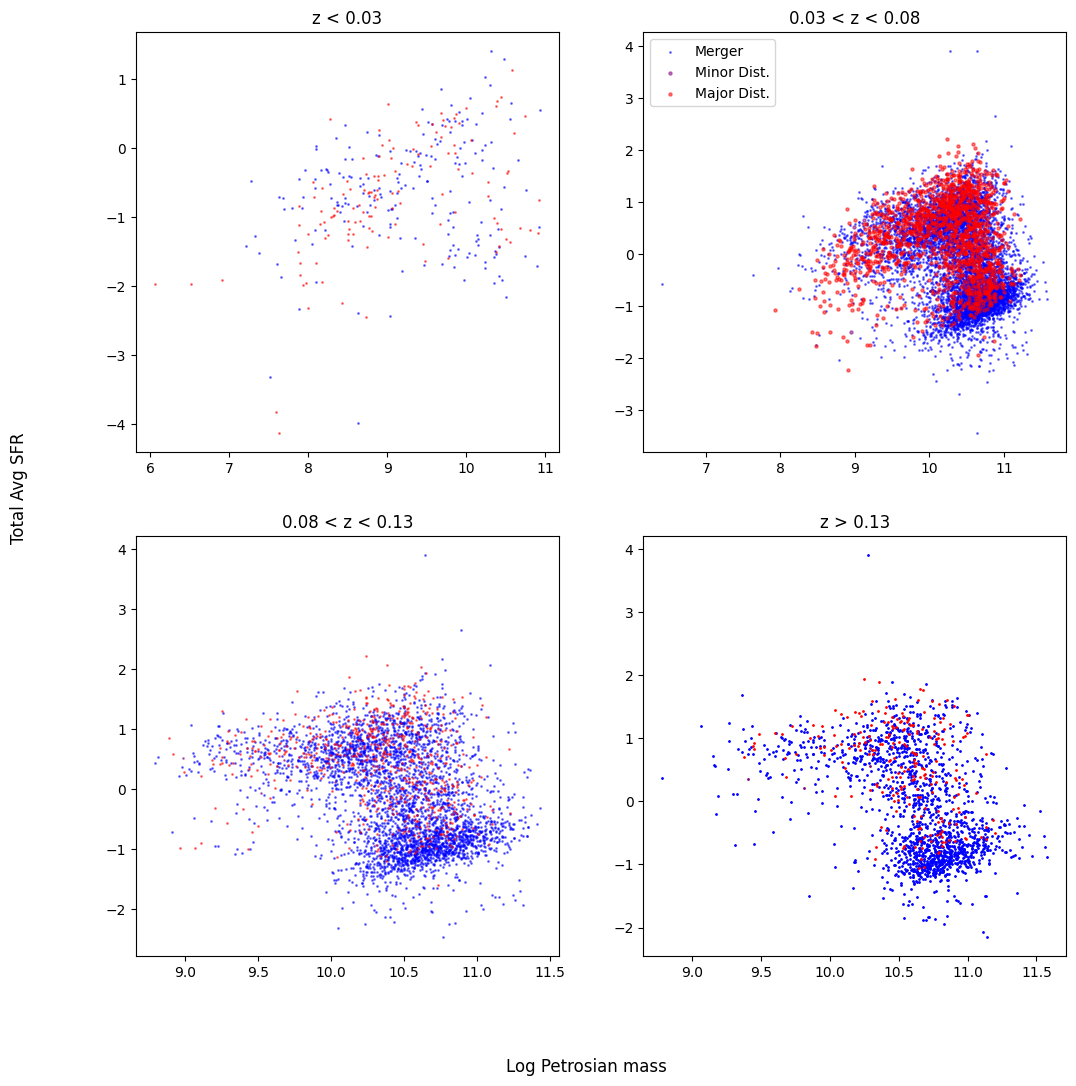

In [112]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize = (12,12))

axes[0,0].scatter(list(df_z_1.query('category=="merger"').elpetro_mass_log), list(df_z_1.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5)
axes[0,0].scatter(list(df_z_1.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_1.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1, alpha = 0.5)
axes[0,0].scatter(list(df_z_1.query('category=="major_interaction"').elpetro_mass_log), list(df_z_1.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1, alpha = 0.5)
axes[0,0].set_title('z < 0.03')

axes[0,1].scatter(list(df_z_2.query('category=="merger"').elpetro_mass_log), list(df_z_2.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5, label = 'Merger')
axes[0,1].scatter(list(df_z_2.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_2.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 5, alpha = 0.5, label = 'Minor Dist.')
axes[0,1].scatter(list(df_z_2.query('category=="major_interaction"').elpetro_mass_log), list(df_z_2.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 5, alpha = 0.5, label = 'Major Dist.')
axes[0,1].set_title('0.03 < z < 0.08')

axes[1,0].scatter(list(df_z_3.query('category=="merger"').elpetro_mass_log), list(df_z_3.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5)
axes[1,0].scatter(list(df_z_3.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_3.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1, alpha = 0.5)
axes[1,0].scatter(list(df_z_3.query('category=="major_interaction"').elpetro_mass_log), list(df_z_3.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1, alpha = 0.5)
axes[1,0].set_title('0.08 < z < 0.13')

axes[1,1].scatter(list(df_z_4.query('category=="merger"').elpetro_mass_log), list(df_z_4.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1)
axes[1,1].scatter(list(df_z_4.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_4.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1)
axes[1,1].scatter(list(df_z_4.query('category=="major_interaction"').elpetro_mass_log), list(df_z_4.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1)
axes[1,1].set_title('z > 0.13')

fig.supxlabel('Log Petrosian mass')
fig.supylabel('Total Avg SFR')
axes[0,1].legend()
plt.show()

In [123]:
no_int_m_z_sfr_tmp = df[['elpetro_mass_log', 'redshift', 'total_sfr_avg']].dropna().query('total_sfr_avg > -50')
no_int_m_z_sfr = no_int_m_z_sfr_tmp.query('total_sfr_avg < 3.5')
no_int_m_z_sfr

,elpetro_mass_log,redshift,total_sfr_avg
28,10.636278,0.107701,-0.63351
73,10.111020,0.086522,-1.54185
76,9.515684,0.071808,0.07252
99,10.191099,0.098643,-0.17914
100,10.620791,0.146549,-1.02662
...,...,...,...
7744210,10.444693,0.131147,-0.83885
7744214,9.379950,0.064372,0.03805
7744217,10.140887,0.102275,-0.94027
7744226,10.208566,0.090551,-0.12839


In [124]:
df_z_1_non = no_int_m_z_sfr.query('redshift <= 0.03')
df_z_2_non = no_int_m_z_sfr.query('redshift > 0.03 and redshift <= 0.8')
df_z_3_non = no_int_m_z_sfr.query('redshift > 0.08 and redshift <= 0.13')
df_z_4_non = no_int_m_z_sfr.query('redshift > 0.13')

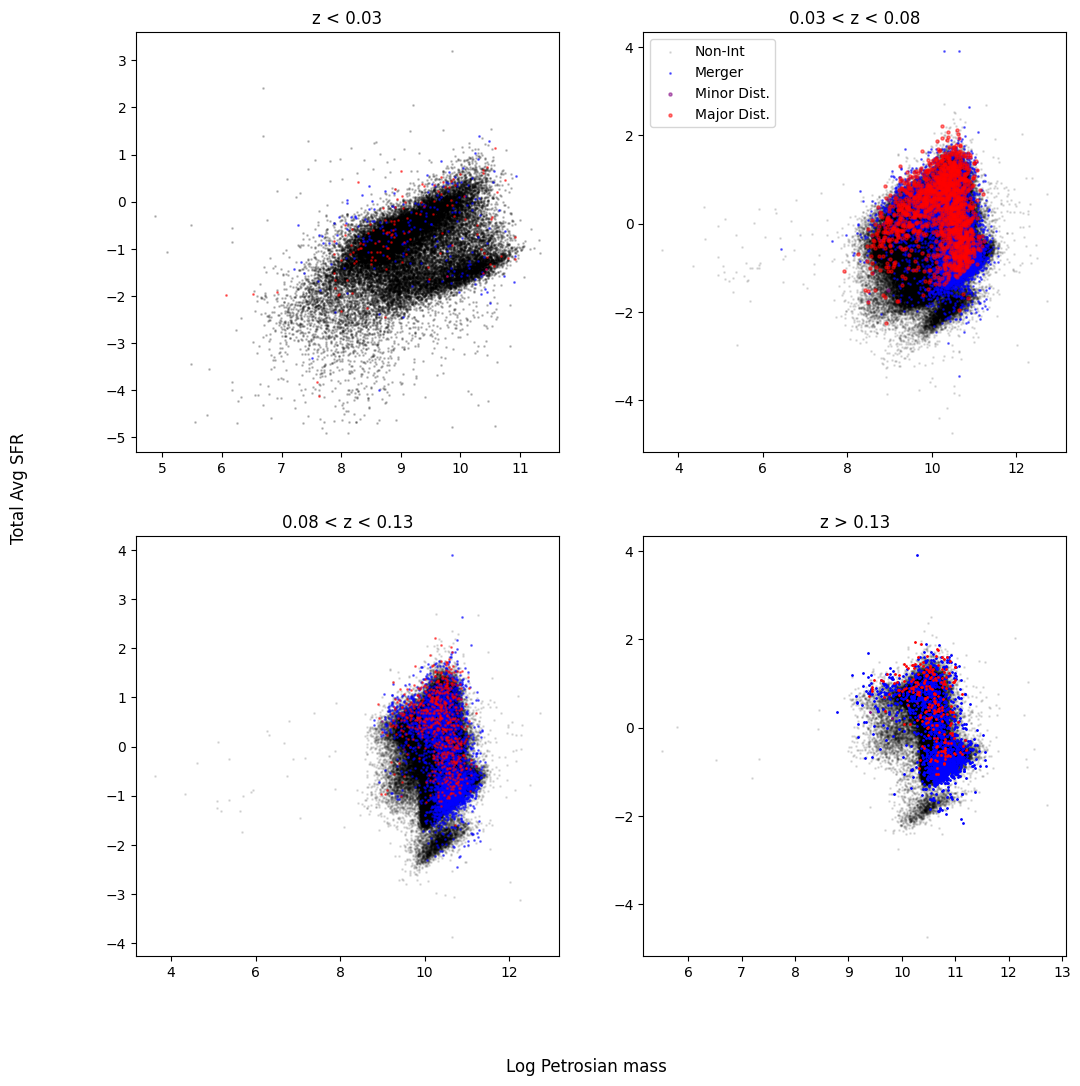

In [125]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize = (12,12))

axes[0,0].scatter(list(df_z_1_non.elpetro_mass_log), list(df_z_1_non.total_sfr_avg), color = 'black', s = 1, alpha = 0.2)
axes[0,0].scatter(list(df_z_1.query('category=="merger"').elpetro_mass_log), list(df_z_1.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5)
axes[0,0].scatter(list(df_z_1.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_1.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1, alpha = 0.5)
axes[0,0].scatter(list(df_z_1.query('category=="major_interaction"').elpetro_mass_log), list(df_z_1.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1, alpha = 0.5)
axes[0,0].set_title('z < 0.03')

axes[0,1].scatter(list(df_z_2_non.elpetro_mass_log), list(df_z_2_non.total_sfr_avg), color = 'black', s = 1, alpha = 0.1, label = 'Non-Int')
axes[0,1].scatter(list(df_z_2.query('category=="merger"').elpetro_mass_log), list(df_z_2.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5, label = 'Merger')
axes[0,1].scatter(list(df_z_2.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_2.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 5, alpha = 0.5, label = 'Minor Dist.')
axes[0,1].scatter(list(df_z_2.query('category=="major_interaction"').elpetro_mass_log), list(df_z_2.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 5, alpha = 0.5, label = 'Major Dist.')
axes[0,1].set_title('0.03 < z < 0.08')

axes[1,0].scatter(list(df_z_3_non.elpetro_mass_log), list(df_z_3_non.total_sfr_avg), color = 'black', s = 1, alpha = 0.1)
axes[1,0].scatter(list(df_z_3.query('category=="merger"').elpetro_mass_log), list(df_z_3.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1, alpha = 0.5)
axes[1,0].scatter(list(df_z_3.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_3.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1, alpha = 0.5)
axes[1,0].scatter(list(df_z_3.query('category=="major_interaction"').elpetro_mass_log), list(df_z_3.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1, alpha = 0.5)
axes[1,0].set_title('0.08 < z < 0.13')

axes[1,1].scatter(list(df_z_4_non.elpetro_mass_log), list(df_z_4_non.total_sfr_avg), color = 'black', s = 1, alpha = 0.1)
axes[1,1].scatter(list(df_z_4.query('category=="merger"').elpetro_mass_log), list(df_z_4.query('category=="merger"').total_sfr_avg), color = 'blue', s = 1)
axes[1,1].scatter(list(df_z_4.query('category=="minor_interaction"').elpetro_mass_log), list(df_z_4.query('category=="minor_interaction"').total_sfr_avg), color = 'purple', s = 1)
axes[1,1].scatter(list(df_z_4.query('category=="major_interaction"').elpetro_mass_log), list(df_z_4.query('category=="major_interaction"').total_sfr_avg), color = 'red', s = 1)
axes[1,1].set_title('z > 0.13')

fig.supxlabel('Log Petrosian mass')
fig.supylabel('Total Avg SFR')
axes[0,1].legend()
plt.show()